In [1]:
# import pandas
%matplotlib inline
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.linear_model import RidgeCV, RANSACRegressor, LassoCV
from pandas.io import data



In [2]:
# Get SP 500 data
data.get_data_yahoo?
sp500 = data.get_data_yahoo('spy', start='1/1/1994', pause=0.01)

In [3]:
data.get_data_yahoo?


In [4]:
# Get values from an initial period for training
frac = 1.
N_start_days = int(round(sp500.index.size // frac)) 
start_days = sp500.index[:N_start_days].to_julian_date()
start_values = sp500.ix[:N_start_days, -1].values
X = sp.array(start_days).reshape(-1, 1)

# Account for the effect of inflation
t0, t1 = X.min(), X.max()
print((t1 - t0) / 365.)

y0, y1 = 1, sp.exp(0.025*(t1 - t0) / 365.) #1.65
b, a = sp.linalg.solve(sp.array([[1, t0],[1, t1]]), sp.array([y0, y1]))
c = sp.exp(b)
fun_inflation = lambda t: c * sp.exp(a * t)

# factor
ifactor_train = 1.0 / fun_inflation(X.reshape(-1))


y = sp.log(start_values * ifactor_train)

ifactor = 1.0 / fun_inflation(sp.array(sp500.index.to_julian_date()).reshape(-1))

# Train a model
lasso = LassoCV()
lasso.fit(X, y)

# Define the model
y = lambda x: sp.exp(lassp.predict(x))
sp_start_model = lambda x: sp.exp(lasso.predict(sp.array(x.to_julian_date()).reshape(-1,1)))


22.0356164384


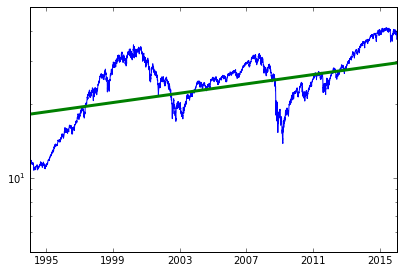

In [21]:
f = plt.figure(0)
f.clf()
ax = f.add_axes([.1, .1, .85, .85])
ax.semilogy(sp500.index, sp500.ix[:,-1] * ifactor, )
ax.semilogy(sp500.index, sp_start_model(sp500.index), linewidth=3)
ax.set_ybound(5,50)

# compute a plot an inflation curve
xmin = X.min() 
dx = X.max() - xmin 


In [6]:
# Account for the effect of inflation
t0, t1 = X.min(), X.max()
y0, y1 = 1, 1.65
b, a = sp.linalg.solve(sp.array([[1, t0],[1, t1]]), sp.array([y0, y1]))
c = sp.exp(b)
fun_inflation = lambda t: c * sp.exp(a * t)

# factor
ifactor = 1.0 / fun_inflation(sp.array(sp500.index.to_julian_date()).reshape(-1))



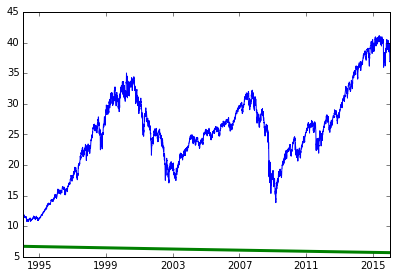

In [7]:
f = plt.figure(1)
f.clf()
ax = f.add_axes([.1, .1, .85, .85])
ax.plot(sp500.index, ifactor * sp500.ix[:,-1])
ax.plot(sp500.index, ifactor * sp_start_model(sp500.index), linewidth=3)

# compute a plot an inflation curve
xmin = X.min() 
dx = X.max() - xmin 


In [15]:
print(lasso.alphas_)


[  4.12852879e+02   3.85027977e+02   3.59078380e+02   3.34877699e+02
   3.12308063e+02   2.91259545e+02   2.71629626e+02   2.53322699e+02
   2.36249596e+02   2.20327164e+02   2.05477851e+02   1.91629331e+02
   1.78714156e+02   1.66669420e+02   1.55436459e+02   1.44960562e+02
   1.35190705e+02   1.26079304e+02   1.17581981e+02   1.09657349e+02
   1.02266811e+02   9.53743698e+01   8.89464565e+01   8.29517630e+01
   7.73610918e+01   7.21472132e+01   6.72847325e+01   6.27499667e+01
   5.85208290e+01   5.45767209e+01   5.08984326e+01   4.74680486e+01
   4.42688610e+01   4.12852879e+01   3.85027977e+01   3.59078380e+01
   3.34877699e+01   3.12308063e+01   2.91259545e+01   2.71629626e+01
   2.53322699e+01   2.36249596e+01   2.20327164e+01   2.05477851e+01
   1.91629331e+01   1.78714156e+01   1.66669420e+01   1.55436459e+01
   1.44960562e+01   1.35190705e+01   1.26079304e+01   1.17581981e+01
   1.09657349e+01   1.02266811e+01   9.53743698e+00   8.89464565e+00
   8.29517630e+00   7.73610918e+00